In [2]:
#IMPORTS AND LOADING DATA
%matplotlib inline
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt

def configure_plots():
    '''Configures plots by making some quality of life adjustments'''
    for _ in range(2):
        plt.rcParams['figure.figsize'] = [16/2, 9/2]
        plt.rcParams['axes.titlesize'] = 20
        plt.rcParams['axes.labelsize'] = 16
        plt.rcParams['xtick.labelsize'] = 14
        plt.rcParams['ytick.labelsize'] = 14
        plt.rcParams['lines.linewidth'] = 2

configure_plots()

med = pd.read_csv("../data/med.csv")
people = pd.read_csv("../data/people.csv")
combined= pd.read_csv("../data/combined.csv")

Missing values pose a problem for analyzing cavity data because many some cavity numbers are recorded as 0, and there are many NA values. It is possible that the proportion of people with 0 cavities amount the NA values is higher than in the rest of the data because a scribe might see it as less important to record a 0. 

To begin with, I will just analyze the results of the group of people that has cavity data from all medical fairs. 

n = 15.0
---------------------ANALYSIS FOR DATE 2021-05-01---------------------
Average cavities: 2.8
---------------------ANALYSIS FOR DATE 2021-11-01---------------------
Average cavities: 3.6666666666666665
---------------------ANALYSIS FOR DATE 2022-04-01---------------------
Average cavities: 4.466666666666667
---------------------ANALYSIS FOR DATE 2022-11-01---------------------
Average cavities: 1.5333333333333334
---------------------ANALYSIS FOR DATE 2023-04-01---------------------
Average cavities: 3.1333333333333333


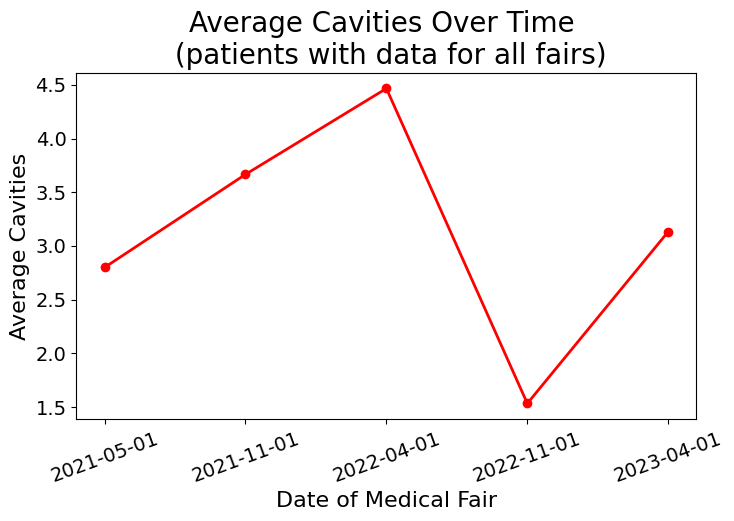

In [8]:
#Finding people who have cavity data from all medical fairs

no_na = combined.dropna(axis="index", subset="Cavities")

list = no_na["Individual Id"].to_list() 
counts = {x:list.count(x) for x in list}

#Make a list of all patients who have data for all medical fairs
all = []
for id in np.unique(list): 
    if counts[id] == 5: 
        all.append(id)

#Filter df to only include the patients who have data for all medical fairs
all_fairs = no_na[no_na["Individual Id"].isin(all)]
all_fairs.sort_values("Individual Id")

print(f"n = {all_fairs.shape[0]/5}")

cav_list = []
for date in np.sort(all_fairs["Date"].unique()): 
    df = all_fairs[all_fairs["Date"] == date]
    print("-------"*3 + f"ANALYSIS FOR DATE {date}" + "-------"*3)
    cavities = np.mean(df["Cavities"])
    print(f"Average cavities: {cavities}")
    cav_list.append(cavities)

tick = np.sort(all_fairs["Date"].unique())
plt.title("Average Cavities Over Time \n (patients with data for all fairs)")
plt.xticks([0, 1, 2, 3, 4], [tick[0], tick[1], tick[2], tick[3], tick[4]], rotation=20)
plt.xlabel("Date of Medical Fair")
plt.ylabel("Average Cavities")
fmt='ro-'
plt.plot(cav_list, fmt)
plt.show()

Cavities increase linearly for the first three medical fairs, but are much lower 2022-11-01. This likely demonstrates the effectiveness of SDF on prevention of cavities, because our dentists applied SDF to teeth on 2022-04-01. However, the increase in cavities on 2023-04-01 indicates that the SDF may be wearing off and needs to be reapplied. This finding fits with research on SDF that suggests it is only effective for 6-12 months. 


The population size for this analysis is small, 15 patients. 

In [9]:
#Investigating the population
ids = all_fairs["Individual Id"].to_list()
all_people = people[people["Individual Id"].isin(ids)]
all_people

,Individual Id,Family Id,Gender,Relationship To Primary,Highest Education Level,Birth State,Birth City,Super Saturday,Feed A Family,Education Program,Age
6,400.0,4,f,primary,none,sinaloa,NaN,False,False,False,44.0
21,900.0,9,f,primary,primary,guanajuato,NaN,True,True,False,35.0
30,1004.0,10,f,child,primary,sonora,NaN,False,False,False,11.0
42,1300.0,13,f,primary,secondary,sonora,NaN,True,True,False,32.0
43,1301.0,13,m,child,primary,sonora,NaN,True,True,False,8.0
56,1600.0,16,f,primary,primary,nayarit,NaN,True,True,False,53.0
76,2502.0,25,f,child,kindergarten,sonora,NaN,True,True,True,8.0
77,2503.0,25,m,child,primary,sonora,NaN,True,True,True,10.0
89,2900.0,29,f,primary,primary,baja california,mexicali,True,True,False,34.0
90,2901.0,29,f,child,primary,sonora,san luis,True,True,True,10.0
